In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
from backtester import Backtest
from portfolio.portfolio import Portfolio
from portfolio.asset import Asset
from datahandler import HistoricalAssetData
from statistics.charts import returns_chart, returns_histogram, monthly_returns_heatmap

In [3]:
%config InlineBackend.figure_format="retina"
%matplotlib inline

In [4]:
import pandas_datareader.data as web
import datetime

As a first example, we run a backtest of a portfolio with the following tickers during the year 2019. Data is taken from yahoo finance.

In [5]:
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2019, 12, 31)

tickers = ["VOO", "TUR", "RSX", "EWY", "EWS", "VTIP", "TLT", "BWX", "PDBC", "IAU", "VNQI"]

dfs = []
for ticker in tickers:
    df = web.DataReader(ticker, 'yahoo', start, end).reset_index().rename(columns={'Date': 'date', 'High': 'high', 'Low': 'low', 'Open': 'open', 'Close': 'close', 'Volume': 'volume'})
    df['symbol'] = ticker
    dfs.append(df)


In [9]:
df = pd.concat(dfs)

In [10]:
df = df.sort_values(by='date').reset_index(drop=True)

In [11]:
df.to_csv("data/portfolio_data.csv", index=False)

Use *HistoricalAssetData* to load your csv. Data must include 'date', 'Adj Close' and 'symbol' columns to work.

In [12]:
data = HistoricalAssetData("data/portfolio_data.csv")
schema = data.schema

In [13]:
data

,date,high,low,open,close,volume,Adj Close,symbol
0,2019-01-02,230.850006,226.020004,226.179993,229.990005,4891300.0,225.350449,VOO
1,2019-01-02,15.333000,14.890000,14.920000,15.120000,1382500.0,14.909319,PDBC
2,2019-01-02,122.160004,121.339996,121.660004,122.150002,19841500.0,119.344078,TLT
3,2019-01-02,47.910000,47.860001,47.860001,47.910000,771400.0,46.986149,VTIP
4,2019-01-02,22.100000,21.850000,21.930000,22.100000,876200.0,21.076557,EWS
...,...,...,...,...,...,...,...,...
2767,2019-12-31,27.180000,27.000000,27.110001,27.090000,132900.0,27.090000,TUR
2768,2019-12-31,16.650000,16.510000,16.520000,16.559999,1780800.0,16.559999,PDBC
2769,2019-12-31,295.989990,294.170013,294.529999,295.799988,2512700.0,295.799988,VOO
2770,2019-12-31,136.460007,135.380005,136.210007,135.479996,10707400.0,135.479996,TLT


To create a portfolio, use the Portfolio class and then create assets with Asset(*name*, *percentage*), where *name* should match the name given in the 'symbol' column and *percentage* is the percentage (from 0 to 1) allocated to that specific asset.

In [14]:
portfolio = Portfolio()

In [15]:
VOO = Asset('VOO', 0.1)
TUR = Asset('TUR', 0.05)
RSX = Asset('RSX', 0.05)
EWY = Asset('EWY', 0.05)
EWS = Asset('EWS', 0.05)
VTIP = Asset('VTIP', 0.10)
TLT = Asset('TLT', 0.20)
BWX = Asset('BWX', 0.10)
PDBC = Asset('PDBC', 0.05)
IAU = Asset('IAU', 0.15)
VNQI = Asset('VNQI', 0.10)

In [16]:
portfolio.add_assets([
    VOO, TUR, RSX, EWY, EWS, VTIP, TLT, BWX,
    PDBC, IAU, VNQI
])

Create a *Backtest* object passing it the schema of your data, add the portfolio and data to it and then run it. The *run* method takes the initial capital (default value *1.000.000*) and **periods** as arguments. **periods** defines how often, in months, a rebalancing of the portfolio is made, so that a value of '1' means a monthly rebalancing and '6' a bi-annual one. Note that its value should be a string and it defaults to '1'. For a backtest with no rebalancing use None.

In [17]:
bt = Backtest(schema)
bt.portfolio = portfolio
bt.data = data

In [18]:
bt.run(initial_capital=1_000_000, periods=None)

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:04


,capital,cash,total_value,% change,accumulated return
2019-01-01,1.000000e+06,1000000.000000,NaN,NaN,NaN
2019-01-02,1.000000e+06,403.112655,9.995969e+05,0.000000,1.000000
2019-01-03,9.987008e+05,403.112655,9.982976e+05,-0.001299,0.998701
2019-01-04,1.008706e+06,403.112655,1.008302e+06,0.010018,1.008706
2019-01-07,1.010929e+06,403.112655,1.010526e+06,0.002205,1.010929
...,...,...,...,...,...
2019-12-24,1.158018e+06,403.112655,1.157615e+06,0.002707,1.158018
2019-12-26,1.163238e+06,403.112655,1.162835e+06,0.004508,1.163238
2019-12-27,1.165936e+06,403.112655,1.165533e+06,0.002319,1.165936
2019-12-30,1.163417e+06,403.112655,1.163014e+06,-0.002160,1.163417


When done, the backtester returns a balance sheet with the daily returns and wealth values. Pass this balance dataframe to 
the functions *returns_chart*, *returns_histogram* and *monthly_returns_heatmap* for better visualization. 

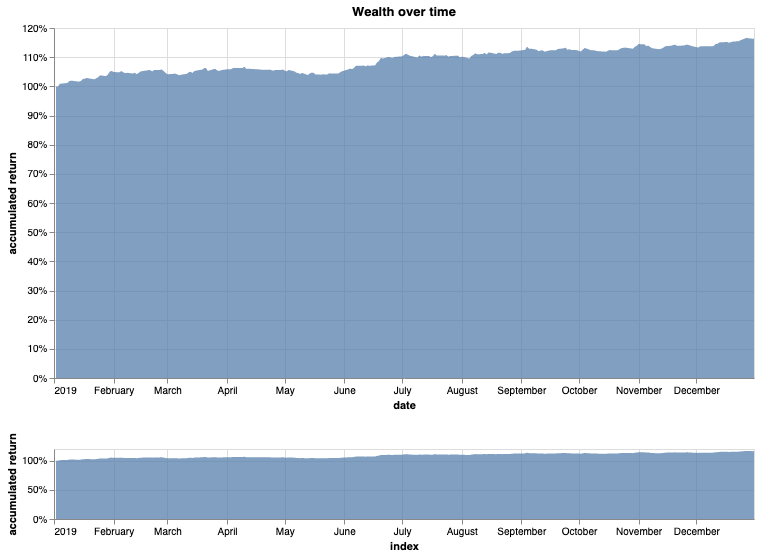

In [19]:
returns_chart(bt.balance)

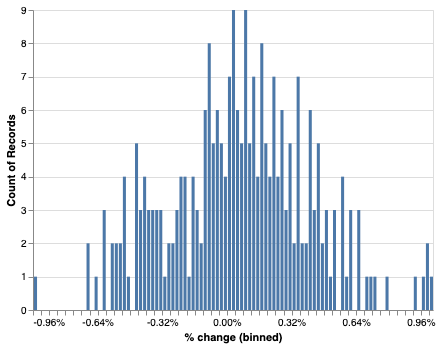

In [20]:
returns_histogram(bt.balance)

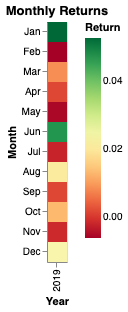

In [21]:
monthly_returns_heatmap(bt.balance)

We now run a backtest of a portfolio from the book "The Ivy Portfolio" by Faber and Richardson, consisting of an even allocation in domestic (US) stocks (VTI), foreign stocks (VEU), bonds (BND), real estate (VNQ) and commodities (DBC).

The data we'll use consists of the last 10 years (2010-2019), once again taken from yahoo finance.

In [22]:
tickers =  ["VTI", "VEU", "BND", "VNQ", "DBC"]

dfs = []
for ticker in tickers:
    start = datetime.datetime(2020, 1, 1)
    end = datetime.datetime(2020, 12, 31)
    for i in range(10):
        start = start.replace(year = start.year - 1)
        end = end.replace(year = end.year - 1)
        df = web.DataReader(ticker, 'yahoo', start, end).reset_index().rename(columns={'Date': 'date', 'High': 'high', 'Low': 'low', 'Open': 'open', 'Close': 'close', 'Volume': 'volume'})
        df['symbol'] = ticker
        dfs.append(df)


In [23]:
ivy_df = pd.concat(dfs)

In [24]:
ivy_df = ivy_df.sort_values(by='date').reset_index(drop=True)

In [25]:
ivy_df.to_csv("data/ivy_portfolio_data.csv", index=False)

In [26]:
data = HistoricalAssetData("data/ivy_portfolio_data.csv")
schema = data.schema

In [27]:
data

,date,high,low,open,close,volume,Adj Close,symbol
0,2010-01-04,57.380001,56.840000,56.860001,57.310001,2251500.0,47.202740,VTI
1,2010-01-04,78.730003,78.540001,78.599998,78.680000,1098100.0,58.797794,BND
2,2010-01-04,44.959999,44.400002,44.660000,44.959999,1692500.0,33.440495,VEU
3,2010-01-04,45.419998,44.200001,45.220001,44.549999,2408400.0,29.869335,VNQ
4,2010-01-04,25.240000,25.070000,25.170000,25.240000,2046900.0,24.523520,DBC
...,...,...,...,...,...,...,...,...
12575,2019-12-31,16.049999,15.910000,15.950000,15.950000,806100.0,15.950000,DBC
12576,2019-12-31,53.790001,53.480000,53.619999,53.750000,1688400.0,53.750000,VEU
12577,2019-12-31,92.830002,92.000000,92.089996,92.790001,4649500.0,92.790001,VNQ
12578,2019-12-31,83.919998,83.769997,83.849998,83.860001,5931300.0,83.860001,BND


In [28]:
portfolio = Portfolio()

In [29]:
VTI = Asset("VTI", 0.2)
VEU = Asset("VEU", 0.2)
BND = Asset("BND", 0.2)
VNQ = Asset("VNQ", 0.2)
DBC = Asset("DBC", 0.2)

In [30]:
portfolio.add_assets([VTI, VEU, BND, VNQ, DBC])

In [31]:
bt = Backtest(schema)
bt.portfolio = portfolio
bt.data = data

In [32]:
# No rebalancing
bt.run(initial_capital = 1_000_000, periods=None)

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:19


,capital,cash,total_value,% change,accumulated return
2010-01-03,1.000000e+06,1000000.000000,NaN,NaN,NaN
2010-01-04,1.000000e+06,92.035288,9.999080e+05,0.000000,1.000000
2010-01-05,1.001321e+06,92.035288,1.001229e+06,0.001321,1.001321
2010-01-06,1.005620e+06,92.035288,1.005528e+06,0.004293,1.005620
2010-01-07,1.004723e+06,92.035288,1.004631e+06,-0.000892,1.004723
...,...,...,...,...,...
2019-12-24,2.039190e+06,92.035288,2.039098e+06,0.001160,2.039190
2019-12-26,2.048080e+06,92.035288,2.047988e+06,0.004360,2.048080
2019-12-27,2.050816e+06,92.035288,2.050724e+06,0.001336,2.050816
2019-12-30,2.045149e+06,92.035288,2.045056e+06,-0.002764,2.045149


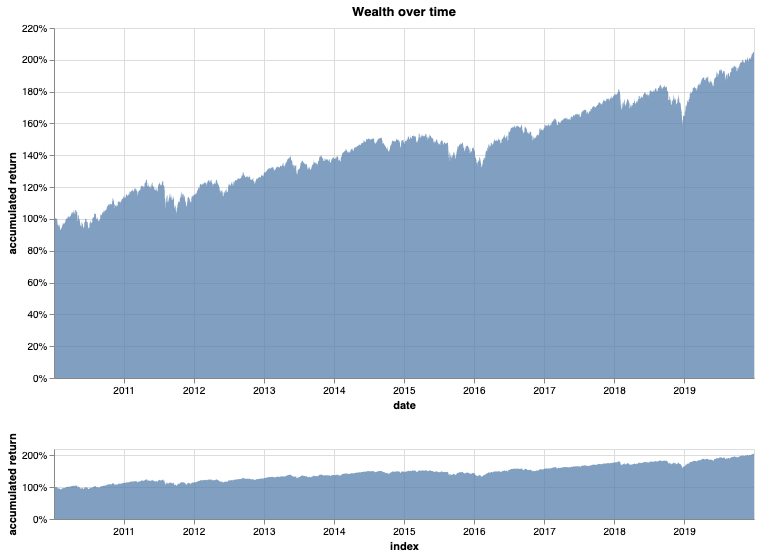

In [33]:
returns_chart(bt.balance)

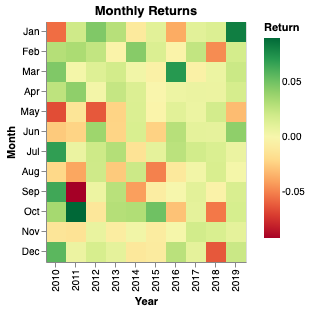

In [34]:
monthly_returns_heatmap(bt.balance)

For comparison, you can run the same backtest on [Portfolio Visualizer.](https://www.portfoliovisualizer.com/backtest-portfolio)

In [35]:
# Monthly rebalancing
bt.run(initial_capital = 1_000_000, periods='1')

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:22


,capital,cash,total_value,% change,accumulated return
2010-01-03,1.000000e+06,1000000.000000,NaN,NaN,NaN
2010-01-04,1.000000e+06,92.035288,9.999080e+05,0.000000,1.000000
2010-01-05,1.001321e+06,92.035288,1.001229e+06,0.001321,1.001321
2010-01-06,1.005620e+06,92.035288,1.005528e+06,0.004293,1.005620
2010-01-07,1.004723e+06,92.035288,1.004631e+06,-0.000892,1.004723
...,...,...,...,...,...
2019-12-24,1.817790e+06,57.640553,1.817733e+06,0.001500,1.817790
2019-12-26,1.826130e+06,57.640553,1.826072e+06,0.004588,1.826130
2019-12-27,1.829028e+06,57.640553,1.828970e+06,0.001587,1.829028
2019-12-30,1.824079e+06,57.640553,1.824021e+06,-0.002706,1.824079


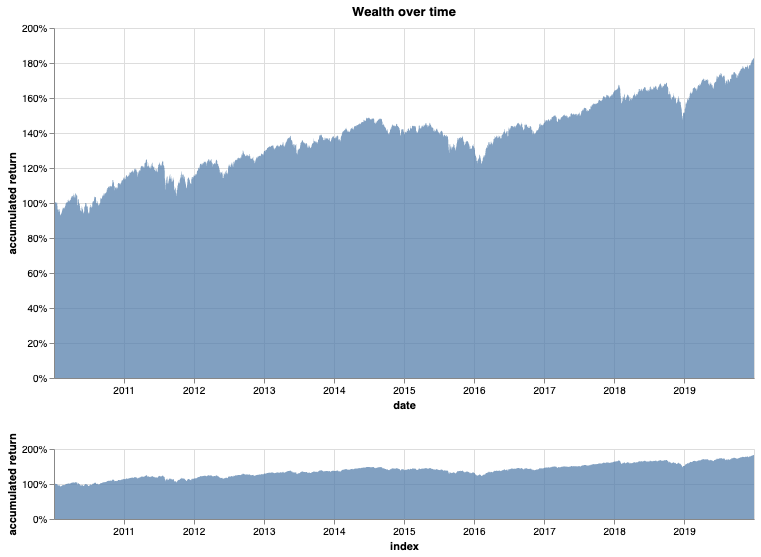

In [36]:
returns_chart(bt.balance)

In [37]:
# Bi-annual rebalancing
bt.run(initial_capital = 1_000_000, periods='6')

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:21


,capital,cash,total_value,% change,accumulated return
2010-01-03,1.000000e+06,1000000.000000,NaN,NaN,NaN
2010-01-04,1.000000e+06,92.035288,9.999080e+05,0.000000,1.000000
2010-01-05,1.001321e+06,92.035288,1.001229e+06,0.001321,1.001321
2010-01-06,1.005620e+06,92.035288,1.005528e+06,0.004293,1.005620
2010-01-07,1.004723e+06,92.035288,1.004631e+06,-0.000892,1.004723
...,...,...,...,...,...
2019-12-24,1.823260e+06,131.209041,1.823129e+06,0.001476,1.823260
2019-12-26,1.831628e+06,131.209041,1.831497e+06,0.004590,1.831628
2019-12-27,1.834523e+06,131.209041,1.834392e+06,0.001580,1.834523
2019-12-30,1.829496e+06,131.209041,1.829364e+06,-0.002740,1.829496


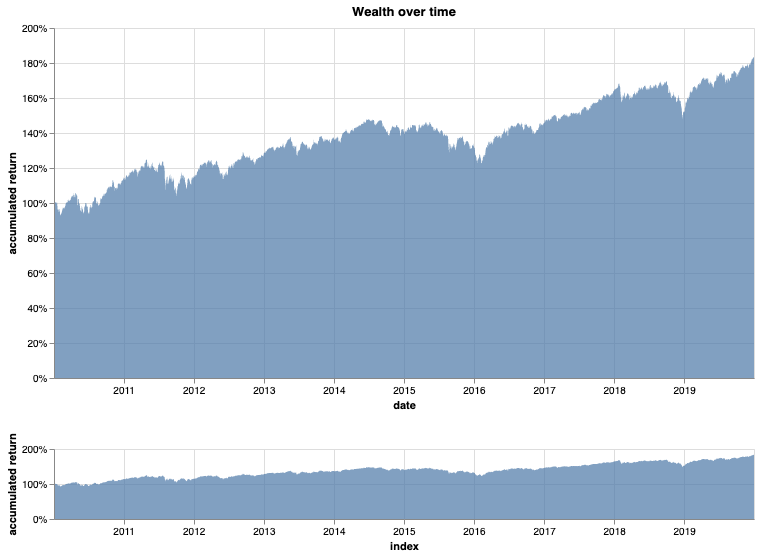

In [38]:
returns_chart(bt.balance)

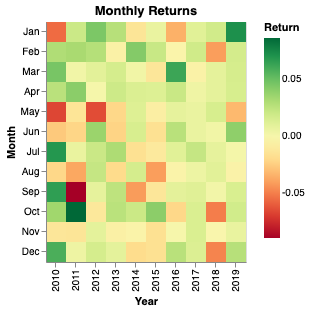

In [39]:
monthly_returns_heatmap(bt.balance)

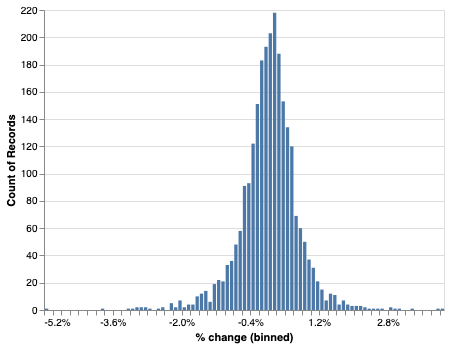

In [40]:
returns_histogram(bt.balance)